In [1]:
import ultralytics
from ultralytics import YOLO

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [3]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

# Just import these 2 modules

In [4]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

# For the object detection model

In [12]:
# model = YOLO('models/yolov8n.pt')
model_seb = YOLO("/home/zdenka/Antonella/train_yolo/sim2air_v8/train_SEB/weights/best.pt")
model_set = YOLO("/home/zdenka/Antonella/train_yolo/sim2air_v8/train_SET/weights/best.pt")
model_suavt = YOLO("/home/zdenka/Antonella/train_yolo/sim2air_v8/train_SUAVT/weights/best.pt")

models = [model_seb, model_set, model_suavt]


In [31]:
img = cv2.imread('/home/zdenka/Antonella/datasets/drone_dataset/validation_v2/img_v2/gopro_scene_0279.png')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [13]:

target_layers_seb =[model_seb.model.model[-4]]
target_layers_set =[model_set.model.model[-4]]
target_layers_suavt =[model_suavt.model.model[-4]]


0: 608x608 1 drone, 9.5ms
Speed: 8.3ms preprocess, 9.5ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 608)


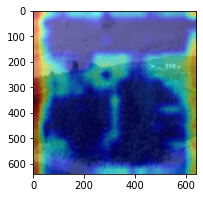

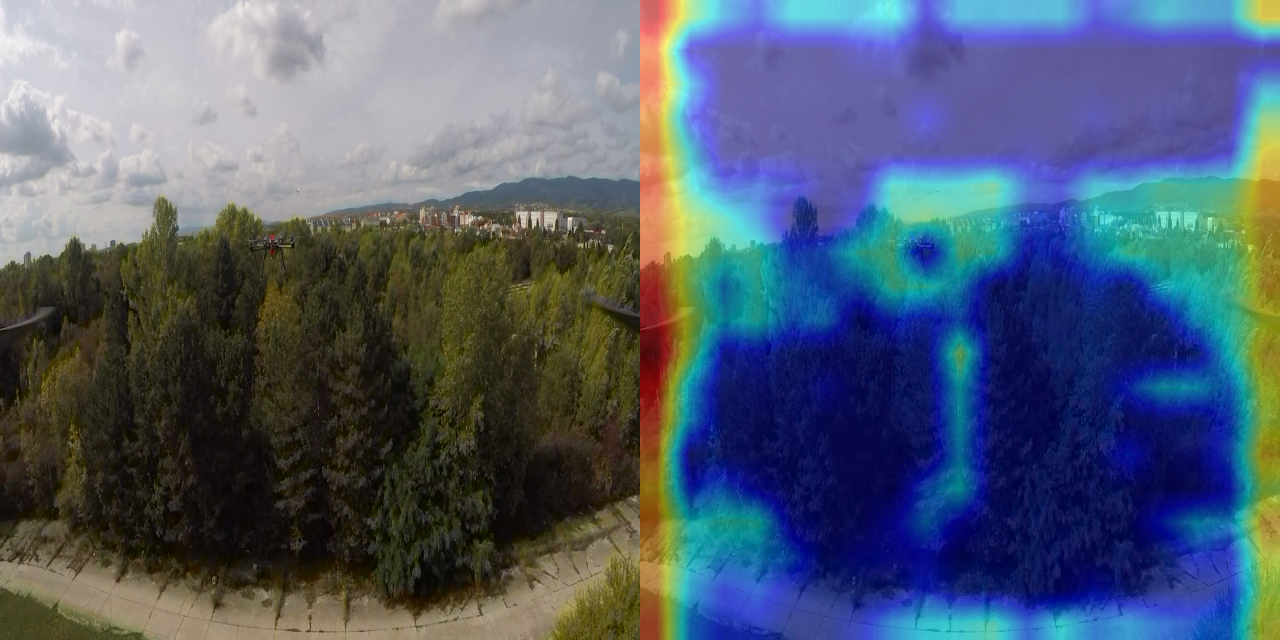


0: 608x608 1 drone, 6.8ms
Speed: 1.7ms preprocess, 6.8ms inference, 0.7ms postprocess per image at shape (1, 3, 608, 608)


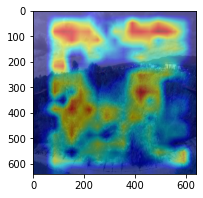

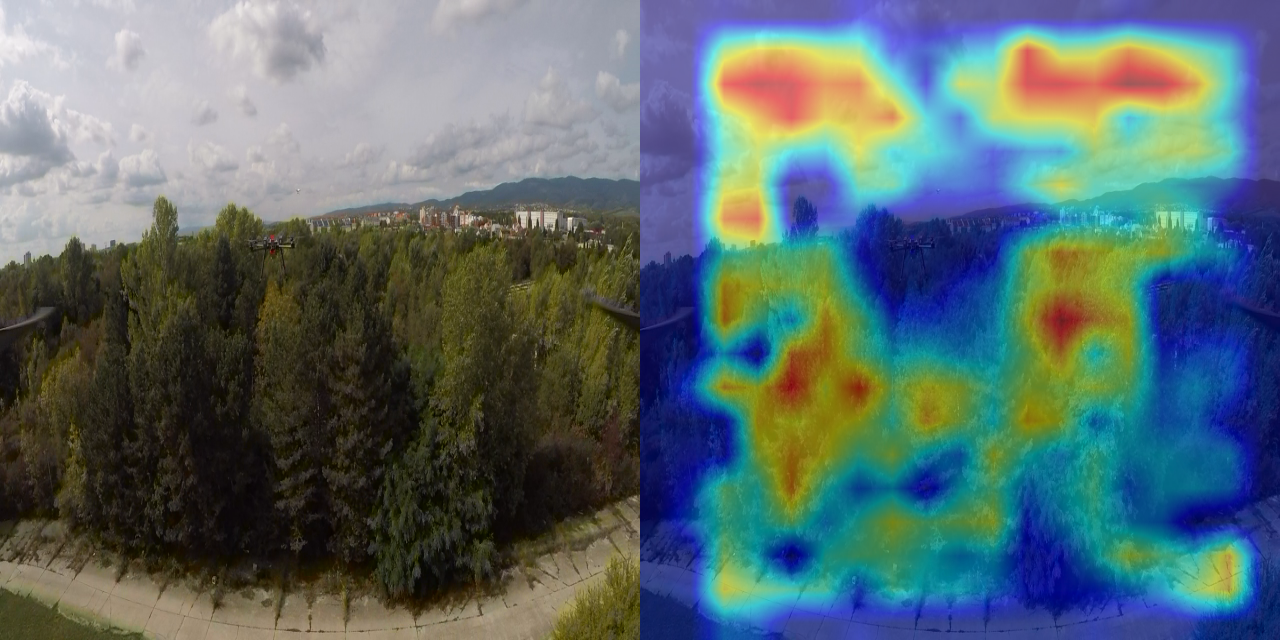


0: 608x608 1 drone, 7.1ms
Speed: 1.6ms preprocess, 7.1ms inference, 0.8ms postprocess per image at shape (1, 3, 608, 608)


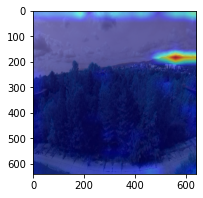

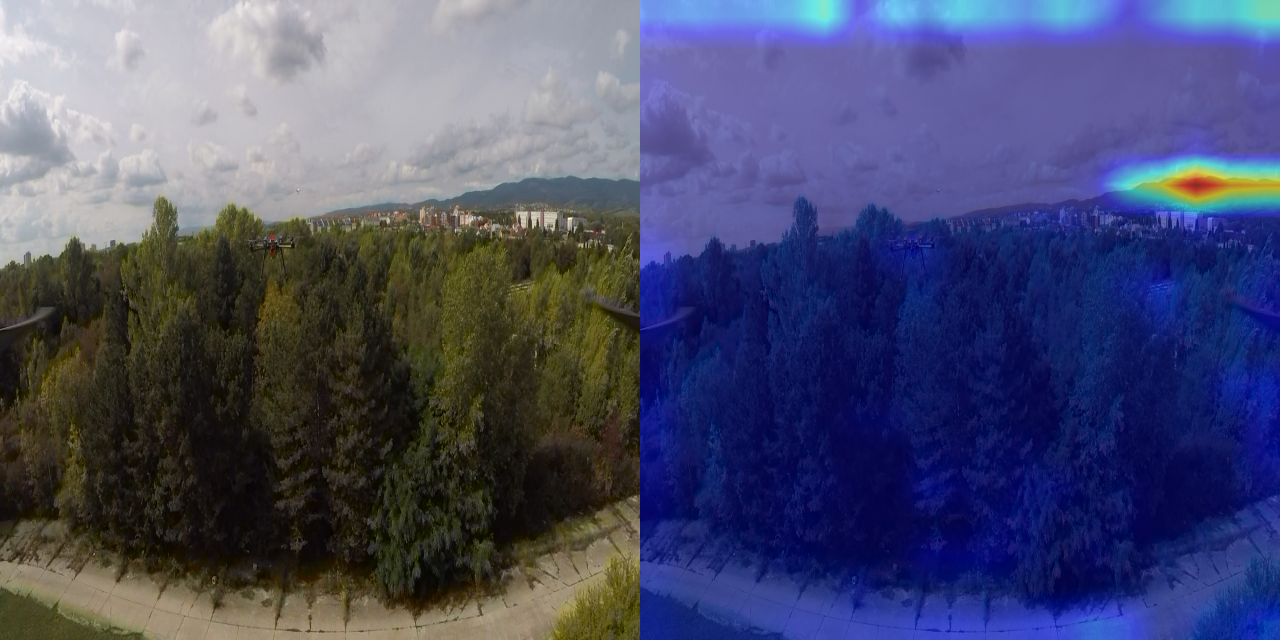

In [44]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)

for model in models:
    target_layers = [model.model.model[-4]]
    cam = EigenCAM(model, target_layers,task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
    plt.imshow(cam_image)
    plt.show()

    stacked = Image.fromarray(np.hstack((im, cam_image)))
    display(stacked)
